In [10]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:

plt.style.use('dark_background')
plt.rcParams['figure.dpi']=300

In [15]:
import sys,os
sys.path.insert(0,'../')

In [16]:
import prfm.simulations as sims
conv=sims.conv

In [17]:
figdir = '../figure/'

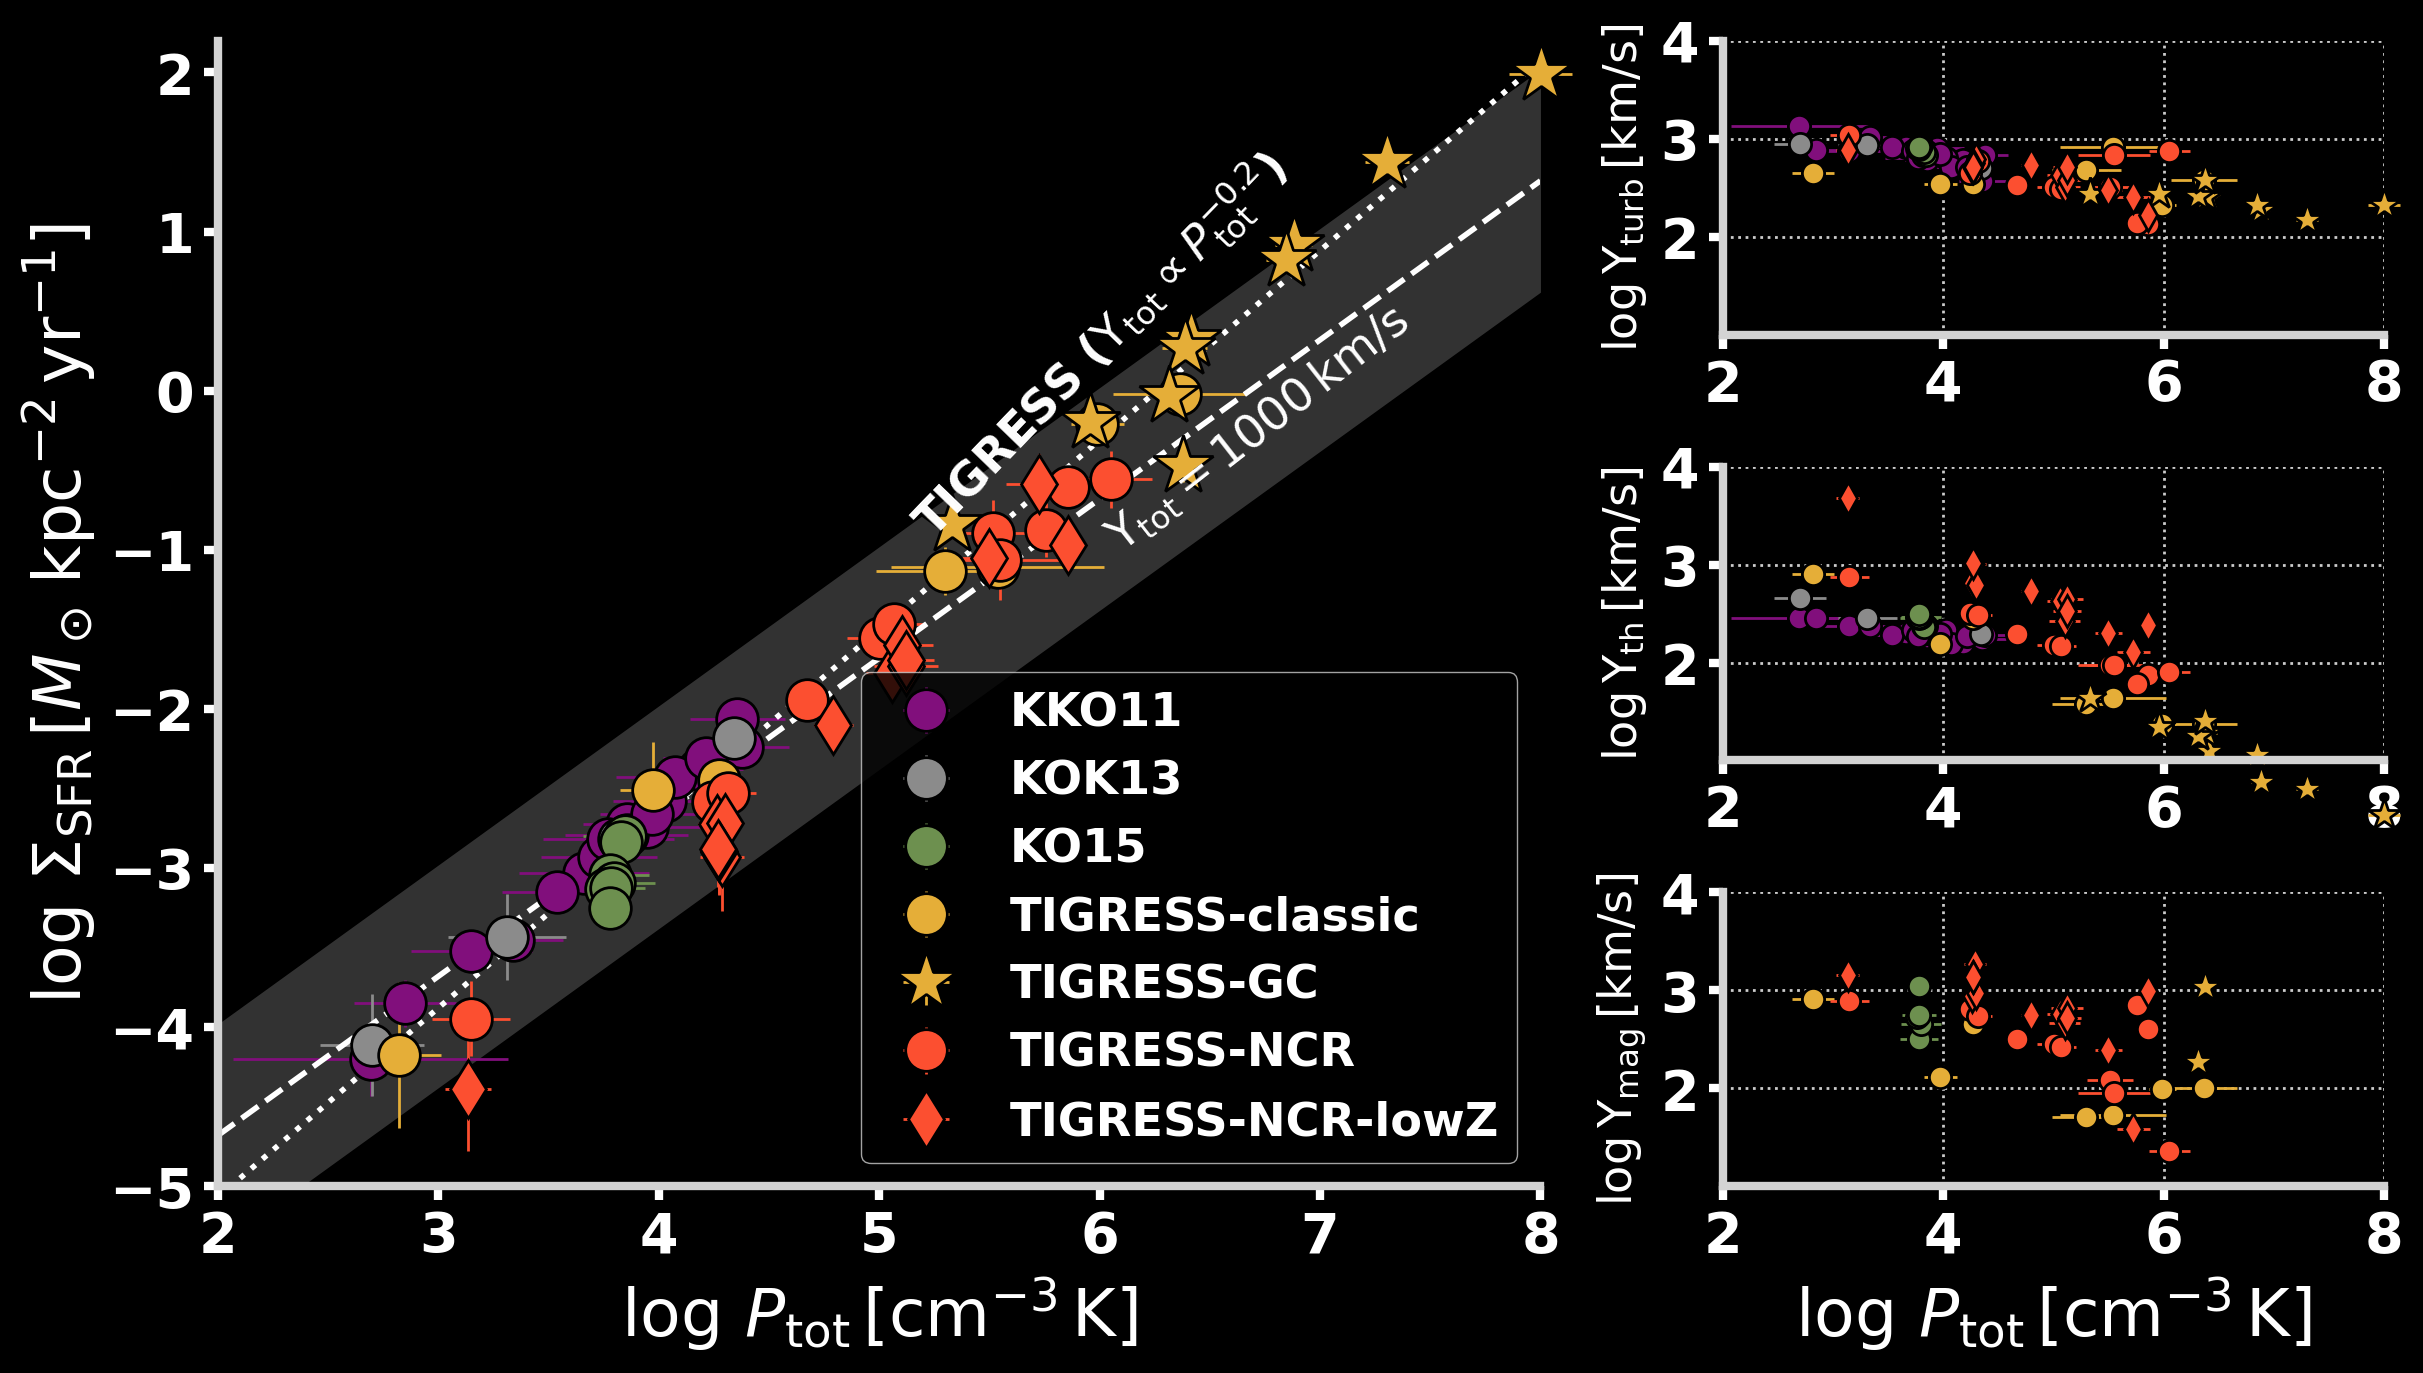

In [18]:
with plt.style.context(['fivethirtyeight','../presentation-dark.mplstyle']):
    fig = plt.figure(figsize=(12, 6.75), layout="constrained")
    spec = fig.add_gridspec(3,2,width_ratios=(2,1))

    ax0 = fig.add_subplot(spec[:,0])

    ax10 = fig.add_subplot(spec[0,1])
    ax11 = fig.add_subplot(spec[1,1])
    ax12 = fig.add_subplot(spec[2,1])

    pall = dict()
    for i,(k,c,m) in enumerate(zip(list(sims.data.keys()),
                             ['C5','C4','C3','C2','C2','C1','C1'],
                             ['o','o','o','o','*','o','d'],
                             )
                             ):
        data = sims.data[k]   
        points=[]
        plt.sca(ax0)
        x = data.log_Ptot
        y = data.log_SFR
        xerr = data.log_Ptot_std
        yerr = data.log_SFR_std
        p=plt.errorbar(x,y,yerr=yerr,xerr=xerr,
                    marker=m,ls='',mew=1,mec='k',
                    lw=1,color=c,ms=15*(1.5 if m == '*' else 1),
                    label=data.paper,clip_on=False)
        points.append(p)
        plt.xlim(2,8)
        plt.ylim(-5,2.2)
        plt.ylabel(r'$\log\,\Sigma_{\rm SFR}\,[M_\odot{\rm\,kpc^{-2}\,yr^{-1}}]$')
        plt.xlabel(r'$\log\,P_{\rm tot}\,[{\rm cm^{-3}\,K}]$')
        for ax, comp in zip([ax10,ax11,ax12],['Pturb','Pth','Pimag']):
            if not hasattr(data,comp): continue
            plt.sca(ax)
            x = data.log_Ptot
            y = getattr(data,f'log_Y_{comp}')
            
            xerr = data.log_Ptot_std
            yerr = getattr(data,f'log_Ystd_{comp}')
            p=plt.errorbar(x,y,yerr=yerr,xerr=xerr,color=c,
                        marker=m,ls='',mew=1,mec='k',ms=8*(1.5 if m == '*' else 1),
                        lw=1,label=data.paper,clip_on=False)                 
            points.append(p)
            plt.xlim(2,8)
            plt.ylim(1,4)
            plt.yticks([2,3,4])
            plt.ylabel(r'$\log \Upsilon_{{\rm {}}}\,[{{\rm km/s}}]$'.format(comp.replace('Pi','P')[1:]),fontsize='small')
            plt.grid('on',ls=':')
        pall[data.paper]=points
    plt.sca(ax12)
    plt.xlabel(r'$\log\,P_{\rm tot}\,[{\rm cm^{-3}\,K}]$')

    plt.sca(ax0)
    plt.legend(loc=4)
    
    logP = np.linspace(2,8,100)
    plt.plot(logP,logP-3.+np.log10(conv),ls='--',color='w')
    plt.fill_between(logP,(logP-3.-0.7+np.log10(conv)),(logP-3.+0.7+np.log10(conv)),
                     color='w',alpha=0.2,lw=0)
    plt.annotate(r'$\Upsilon_{\rm tot}=1000\,{\rm km/s}$',(6,-1),rotation=38,
                 fontsize='small')
    # plt.plot(logP,np.log10(0.48)-6*1.18+1.18*logP,ls='-.',color='w',label='KOK13')
    plt.plot(logP,1.19*(logP-6.26),ls=':',color='w')
    plt.annotate(r'TIGRESS ($\Upsilon_{\rm tot}\propto P_{\rm tot}^{-0.2}$)',
                 (5.1,-0.9),rotation=46,fontsize='small')
    for k, points in pall.items():
        plt.setp(points,'visible',False)
    plt.savefig(os.path.join(figdir,'prfm_plane.png'),bbox_inches='tight')

    p_prev=[]
    for k, points in pall.items():
        plt.setp(p_prev,'alpha',0.5)
        p_prev.append(points)
        plt.setp(points,'visible',True)
        plt.savefig(os.path.join(figdir,'prfm_plane_{}.png'.format(k)),
                    bbox_inches='tight')

    plt.setp(p_prev,'alpha',1)
    plt.savefig(os.path.join(figdir,'prfm_plane_all.png'),bbox_inches='tight')

    plt.show()

In [22]:
from prfm.prfm import *

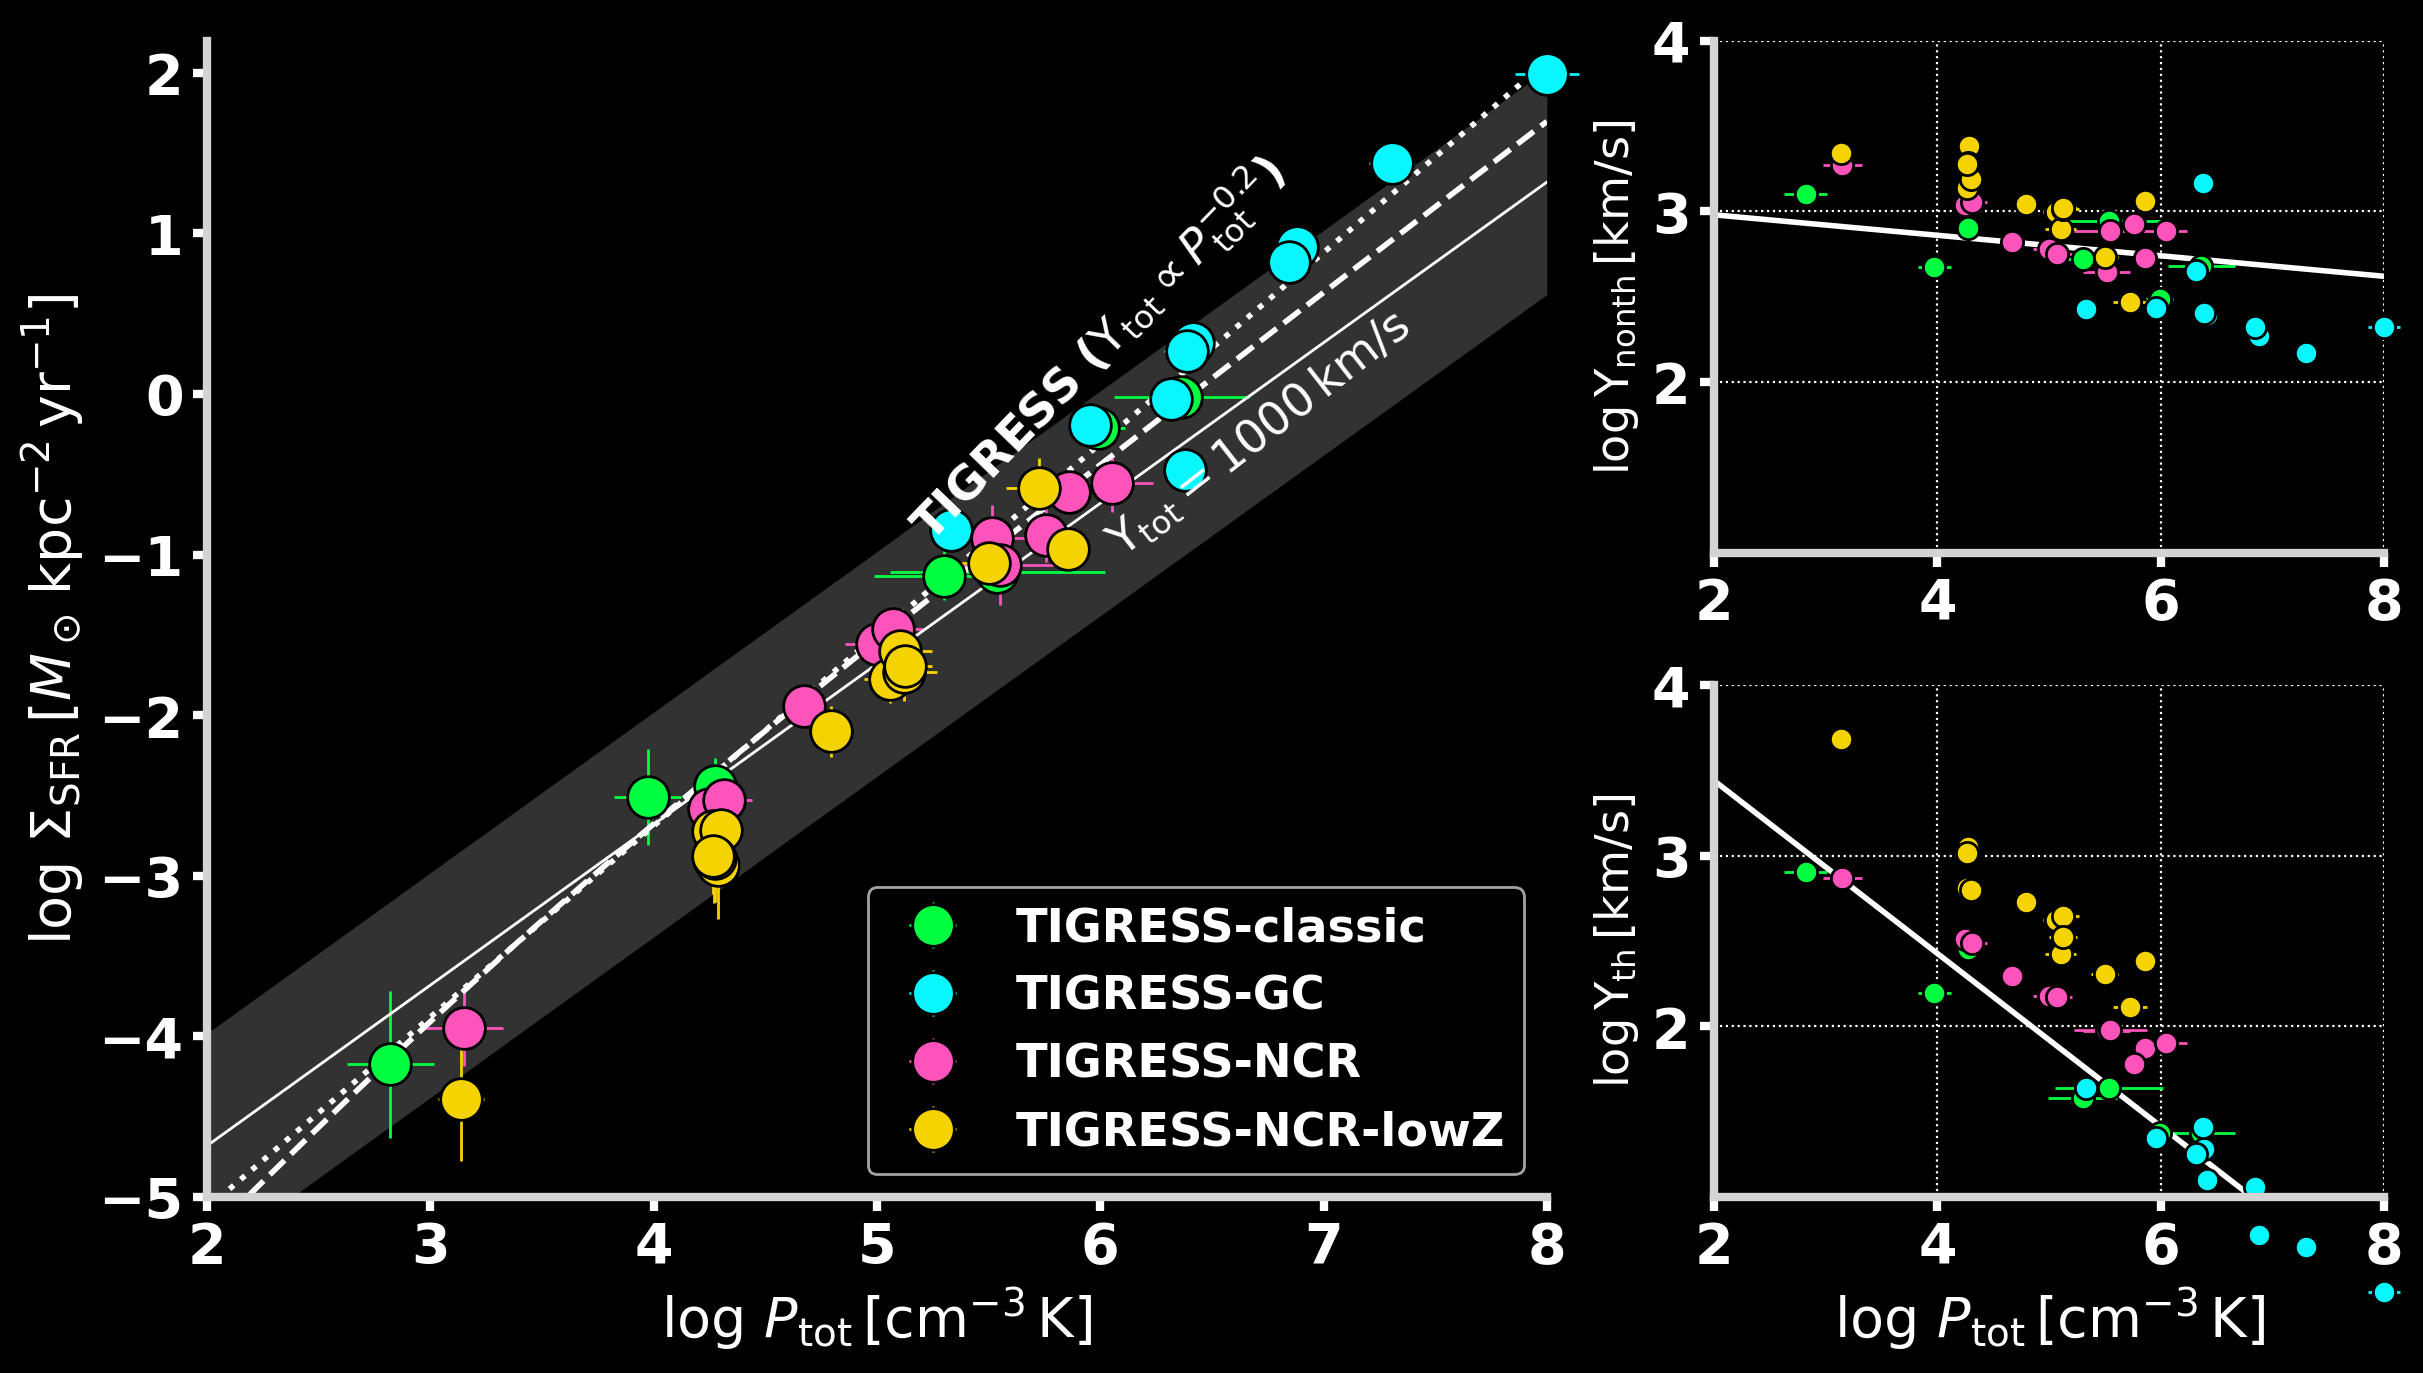

In [24]:
from cycler import cycler

with plt.style.context(['../presentation-dark.mplstyle',
    {'axes.prop_cycle':cycler('color',['#08F7FE','#FE53BB','#F5D300','#00ff41'])}]):
    fig = plt.figure(figsize=(12, 6.75), layout="constrained")
    spec = fig.add_gridspec(2,2,width_ratios=(2,1))

    ax0 = fig.add_subplot(spec[:,0])

    ax10 = fig.add_subplot(spec[0,1])
    ax11 = fig.add_subplot(spec[1,1])
    # ax12 = fig.add_subplot(spec[2,1])

    pall = dict()
    for i,(k,data) in enumerate(list(sims.data.items())):
        if not k.startswith('TIGRESS'): continue
        points=[]
        plt.sca(ax0)
        x = data.log_Ptot
        y = data.log_SFR
        xerr = data.log_Ptot_std
        yerr = data.log_SFR_std
        p=plt.errorbar(x,y,yerr=yerr,xerr=xerr,
                    marker='o',ls='',mew=1,mec='k',
                    lw=1,color='C{}'.format(i),ms=15,
                    label=data.paper,clip_on=False)
        points.append(p)
        plt.xlim(2,8)
        plt.ylim(-5,2.2)
        plt.ylabel(r'$\log\,\Sigma_{\rm SFR}\,[M_\odot{\rm\,kpc^{-2}\,yr^{-1}}]$')
        plt.xlabel(r'$\log\,P_{\rm tot}\,[{\rm cm^{-3}\,K}]$')
        for ax, comp in zip([ax10,ax11],['Pnonth','Pth']):
            if not hasattr(data,comp): continue
            plt.sca(ax)
            x = data.log_Ptot
            y = getattr(data,f'log_Y_{comp}')
            
            xerr = data.log_Ptot_std
            yerr = getattr(data,f'log_Ystd_{comp}')
            p=plt.errorbar(x,y,yerr=yerr,xerr=xerr,color='C{}'.format(i),
                        marker='o',ls='',mew=1,mec='k',ms=8,
                        lw=1,label=data.paper,clip_on=False)                 
            points.append(p)
            plt.xlim(2,8)
            plt.ylim(1,4)
            plt.yticks([2,3,4])
            plt.ylabel(r'$\log \Upsilon_{{\rm {}}}\,[{{\rm km/s}}]$'.format(comp.replace('Pi','P')[1:]),fontsize='small')
            plt.grid('on',ls=':')
        pall[data.paper]=points
    plt.sca(ax10)
    # plt.ylim(2,4)
    plt.sca(ax11)
    plt.xlabel(r'$\log\,P_{\rm tot}\,[{\rm cm^{-3}\,K}]$')

    plt.sca(ax0)
    plt.legend(loc=4)
    
    logP = np.linspace(2,8,100)
    plt.plot(logP,logP-3.+np.log10(conv),ls='-',lw=1,color='w')
    plt.fill_between(logP,(logP-3.-0.7+np.log10(conv)),(logP-3.+0.7+np.log10(conv)),
                     color='w',alpha=0.2,lw=0)
    plt.annotate(r'$\Upsilon_{\rm tot}=1000\,{\rm km/s}$',(6,-1),rotation=38,
                 fontsize='small')
    # plt.plot(logP,np.log10(0.48)-6*1.18+1.18*logP,ls='-.',color='w',label='KOK13')
    plt.plot(logP,1.19*(logP-6.26),ls=':',color='w')
    plt.annotate(r'TIGRESS ($\Upsilon_{\rm tot}\propto P_{\rm tot}^{-0.2}$)',
                 (5.1,-0.9),rotation=46,fontsize='small')
    Pcgs = 10.**logP*kbol_cgs
    plt.plot(logP,np.log10(get_sfr(Pcgs,Ytot='tigress-classic-decomp')/sfr_cgs),
             color='w',ls='--')
    plt.sca(ax10)
    plt.plot(logP,np.log10(get_feedback_yield_comp(Pcgs,comp='trb',model='tigress-classic-decomp')),color='w')
    plt.sca(ax11)
    plt.plot(logP,np.log10(get_feedback_yield_comp(Pcgs,comp='th',model='tigress-classic-decomp')),color='w')
    plt.show()


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

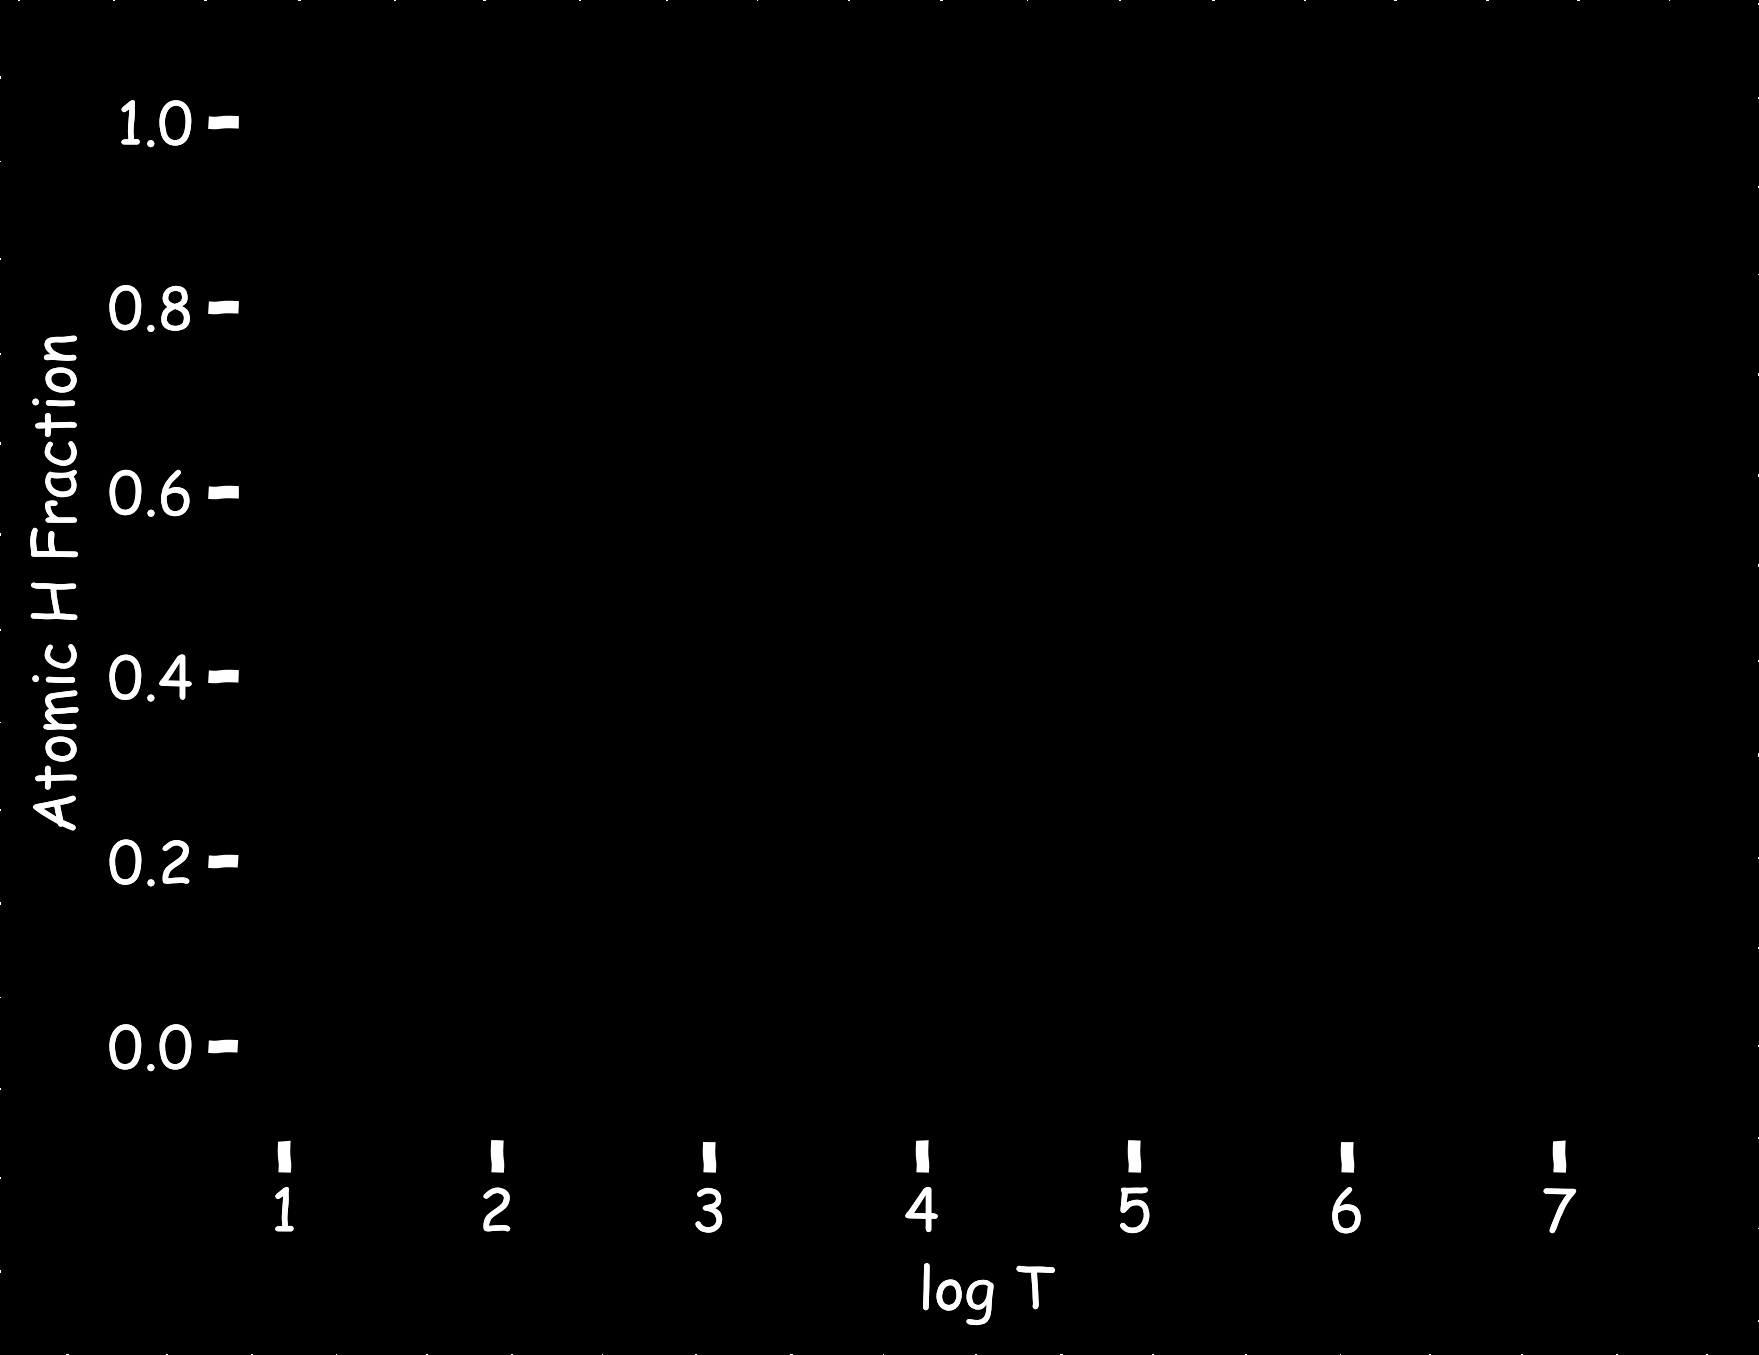

In [142]:
from matplotlib import patheffects

with plt.xkcd():
    plt.rcParams['figure.facecolor'] = 'black'
    plt.rcParams['path.effects'] = [patheffects.withStroke(linewidth=0)]

    # This figure will be in XKCD-style
    fig1 = plt.figure()
    plt.xlim(0.8,7.8)
    plt.ylim(-0.1,1.1)
    plt.xlabel('log T')
    plt.ylabel('Atomic H Fraction')
    plt.grid('on')